In [3]:
import numpy as np

import matplotlib.pyplot as plt



In [4]:
import pandas as pd

In [5]:
import seaborn as sns

In [6]:
import itertools
import warnings
warnings.filterwarnings("ignore")


In [34]:
matches  = pd.read_csv(r"WorldCupMatches.csv")
cups     = pd.read_csv(r"WorldCups.csv")
display("MATCHES - DATA")
display(matches.head(3))
display("WORLD CUPS - DATA")
display(cups.head(3))

'MATCHES - DATA'

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA


'WORLD CUPS - DATA'

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700


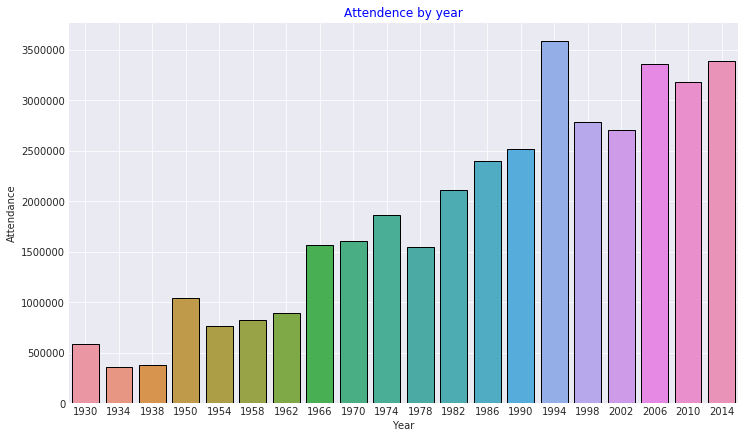

In [8]:
matches.isnull().sum()
sns.set_style("darkgrid")

matches = matches.drop_duplicates(subset="MatchID",keep="first")

matches = matches[matches["Year"].notnull()]

att = matches.groupby("Year")["Attendance"].sum().reset_index()
att["Year"] = att["Year"].astype(int)
plt.figure(figsize=(12,7))
sns.barplot(att["Year"],att["Attendance"],linewidth=1,edgecolor="black")
plt.grid(True)
plt.title("Attendence by year",color='b')
plt.show()

In [13]:
matches

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA
5,1930.0,16 Jul 1930 - 14:45,Group 1,Parque Central,Montevideo,Chile,3.0,0.0,Mexico,,9249.0,1.0,0.0,CRISTOPHE Henry (BEL),APHESTEGUY Martin (URU),LANGENUS Jean (BEL),201.0,1095.0,CHI,MEX
6,1930.0,17 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,4.0,0.0,Bolivia,,18306.0,0.0,0.0,MATEUCCI Francisco (URU),LOMBARDI Domingo (URU),WARNKEN Alberto (CHI),201.0,1092.0,YUG,BOL
7,1930.0,17 Jul 1930 - 14:45,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Paraguay,,18306.0,2.0,0.0,MACIAS Jose (ARG),APHESTEGUY Martin (URU),TEJADA Anibal (URU),201.0,1097.0,USA,PAR
8,1930.0,18 Jul 1930 - 14:30,Group 3,Estadio Centenario,Montevideo,Uruguay,1.0,0.0,Peru,,57735.0,0.0,0.0,LANGENUS Jean (BEL),BALWAY Thomas (FRA),CRISTOPHE Henry (BEL),201.0,1099.0,URU,PER
9,1930.0,19 Jul 1930 - 12:50,Group 1,Estadio Centenario,Montevideo,Chile,1.0,0.0,France,,2000.0,0.0,0.0,TEJADA Anibal (URU),LOMBARDI Domingo (URU),REGO Gilberto (BRA),201.0,1094.0,CHI,FRA


keepcol=['Year','Datetime','Stadium','City','Home Team Name','Home Team Goals','Away Team Goals','Away Team Name','Attendence','MatchID','Home Team Initials',Away Team Initials']

In [28]:
new_matches=pd.read_csv("WorldCupMatches.csv", usecols= ['Year','Datetime','Stadium','City','Home Team Name','Home Team Goals','Away Team Goals','Away Team Name','Attendance','MatchID','Home Team Initials','Away Team Initials'])


In [30]:
display(new_matches.head(3))

,Year,Datetime,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Attendance,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Pocitos,Montevideo,France,4.0,1.0,Mexico,4444.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Parque Central,Montevideo,USA,3.0,0.0,Belgium,18346.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,24059.0,1093.0,YUG,BRA


In [32]:
cups


,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607
5,1958,Sweden,Brazil,Sweden,France,Germany FR,126,16,35,819.810
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32,893.172
7,1966,England,England,Germany FR,Portugal,Soviet Union,89,16,32,1.563.135
8,1970,Mexico,Brazil,Italy,Germany FR,Uruguay,95,16,32,1.603.975
9,1974,Germany,Germany FR,Netherlands,Poland,Brazil,97,16,38,1.865.753


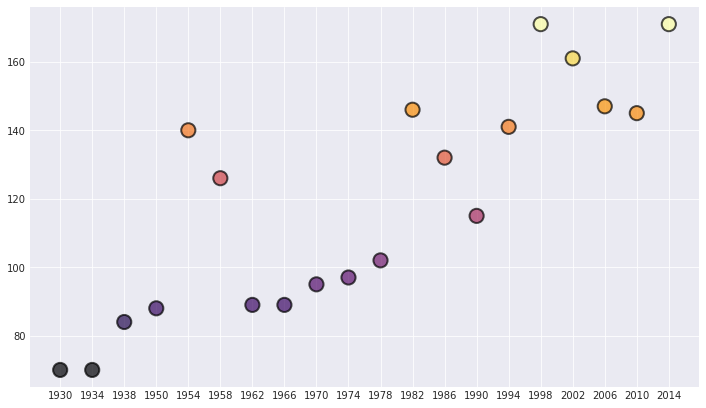

In [44]:
plt.figure(figsize=(12,7))
cups["Year1"] = cups["Year"].astype(str)
ax = plt.scatter("Year1","GoalsScored",data=cups,
            c=cups["GoalsScored"],cmap="inferno",
            s=200,alpha=.7,
            linewidth=2,edgecolor="k",)

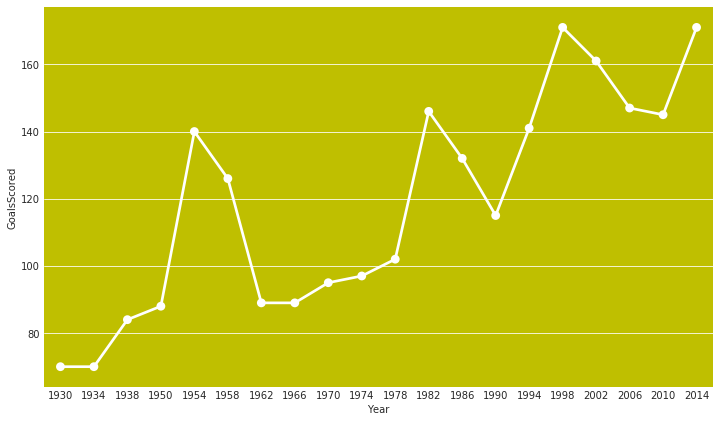

In [48]:
plt.figure(figsize=(12,7))
ax = sns.pointplot(cups["Year"],cups["GoalsScored"],color="w")
ax.set_facecolor("y")